# Summation circuit
---
Main program. See [arXiv:quant-ph/0008033](https://arxiv.org/abs/quant-ph/0008033).

*Author*: Sebastián V. Romero ([sebastian.vidal@rai.usc.es](mailto:sebastian.vidal@rai.usc.es)).

## General imports

In [1]:
from qiskit import QuantumRegister, transpile

%run sum_functions.ipynb

## Circuit construction

### Naive example for 2 qubits

Preparation:
- Top: $\ket{1}\ket{0} = \ket{2}$.
- Bottom: $\ket{0}\ket{1} = \ket{1}$.

After summation:
- Top: $\ket{1}\ket{1} = \ket{3}$.
- Bottom: $\ket{0}\ket{1} = \ket{1}$ (same).

(1+0j) |0110>   
(1-0j) |1110>   
Result: 2+1 = 3


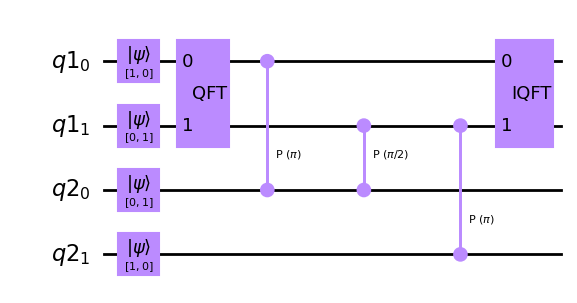

In [2]:
nq = 2
q1 = QuantumRegister(nq, name = 'q1')
q2 = QuantumRegister(nq, name = 'q2')
qc = QuantumCircuit(q1, q2)

zeroState = np.array([1, 0])
oneState  = np.array([0, 1])

for qubit in range(nq):
    if qubit != 0:
        qc.initialize(oneState, q1.index(q1[qubit]))
        qc.initialize(zeroState, q2.index(q2[qubit])+nq)
    else:
        qc.initialize(zeroState, q1.index(q1[qubit]))
        qc.initialize(oneState, q2.index(q2[qubit])+nq)
qc.barrier()

finalState = getState(qc, 2 * nq, fancyPrint = True)

n = len(q1)
qc.append(QFT(n, do_swaps = False), q1)
summation(qc, q2, q1)
qc.append(QFT(n, inverse = True, do_swaps = False), q1)

finalState = getState(qc, 2 * nq, fancyPrint = True)
print('Result: 2+1 = %i' % binaryToInt(finalState[-1][: nq]))

qc.draw(output = 'mpl', plot_barriers = False)

## Version information

In [3]:
import qiskit.tools.jupyter
%qiskit_version_table